In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_train = pd.read_csv('../Dataset/Google_Stock_Price_Train.csv')
dataset_train.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [4]:

training_set = dataset_train.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled=scaler.fit_transform(training_set)


In [7]:
import numpy as np 

X_train = [] 
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor=Sequential()

# First layer with LSTM and droput
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second layer with LSTM and dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third layer with LSTM and dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth layer with LSTM and dropout
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add the output layer 
regressor.add(Dense(units=1))

# Compiling 
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

regressor.fit(X_train, y_train, epochs=100, batch_size=32)




Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - loss: 0.1124
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0075
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0058
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0044
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0058
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0046
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0054
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0045
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - l

In [12]:

# Making predictions and visualizing the results
dataset_test = pd.read_csv('../Dataset/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2].values


dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []


for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


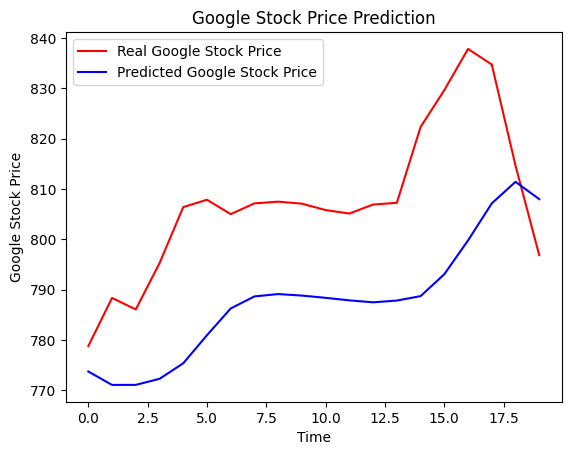

In [13]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()